## Instalación de módulos necesarios
Antes de instalar los modulos, creamos un entorno virtual
- python -m venv analisis

procedemos a instalar las librerias necesarias:
- pip install pandas openpyxl
- pip install matplotlib

# Analisis EDA

__En este notebook nos enfocaremos en el analisis descriptivo.__  
Para realizar un análisis exploratorio de datos (EDA) en Python con el archivo que has proporcionado, procederemos de la siguiente manera:



## I. Hoja 1: Acc_vel_loc_sinrangos

1. Cargar el archivo y examinar las hojas de cálculo: Primero, cargaremos el archivo Excel y listaremos las hojas que contiene.

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
data = pd.read_excel('D:\Bootcamp\Henry\CURSO\Proyecto Individual 2\Repositorio\Data\Internet.xlsx', sheet_name=0) # Acc_vel_loc_sinrangos
data.head()


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. En un analisis simple nos percatamos que existen valores faltantes, en cada provincia exisiten cierta cantidad de usuarios inscritos a cierta velocidad de internet. Se aprecia que los que figuran con valores nulos son donde no hay ningun individuo suscrito a esa velocidad de servicio de internet.  
Para no perder datos y no perjudir el analisis , se decide rellenar los valores faltantes por  "0", asi tenga una representacion numerica. 

In [351]:
data= data.fillna(0)

In [352]:
data.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Verificamos el tipo de datos de cada columna.

In [353]:
data.dtypes

Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros         float64
               ...   
999 Mbps      float64
1000 Mbps     float64
1024 Mbps     float64
4000 Mbps     float64
10000 Mbps    float64
Length: 125, dtype: object

4. Convertimos a partir de la columna 4(Otros) de Flotante a Entero.

In [354]:
columns_to_convert = data.columns[4:]
data[columns_to_convert]= data[columns_to_convert].astype('Int64')
data.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros          Int64
               ...  
999 Mbps       Int64
1000 Mbps      Int64
1024 Mbps      Int64
4000 Mbps      Int64
10000 Mbps     Int64
Length: 125, dtype: object

In [355]:
data.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,2,0,19,0,...,0,0,0,0,0,0,0,0,0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ya con los valores enteros podemos sumar la cantidad de inscritos al servicio de internet.

In [356]:
#Accedemos a las columnas con los valores de la velocidades
columnas_data = columns_to_convert

5.1. Agrupamos por provincia

In [357]:
data_group_provincia = data.groupby(by='Provincia')[columnas_data].sum().reset_index()
data_group_provincia.head()

,Provincia,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,125147,18,25815,169,4611,17899,141,19520,0,...,0,0,563,0,0,26,156691,0,0,0
1,CABA,0,31,451,34,1307,4111,0,249,0,...,0,1,1,0,0,25,68405,0,0,0
2,CATAMARCA,70,0,34,37,0,176,0,115,0,...,0,0,0,0,0,0,20,0,0,0
3,CHACO,3816,0,234,2,0,416,0,780,0,...,0,0,0,0,0,0,150,0,0,0
4,CHUBUT,16640,8,69,34,836,247,0,1870,0,...,0,0,0,0,0,2,0,0,0,0


5.2. Agrupamos por Partido (Distrito)

In [358]:
data_group_partido = data.groupby(by='Partido')[columnas_data].sum().reset_index()
data_group_partido.head()

,Partido,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,12 de Octubre,0,0,4,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1º de Mayo,0,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2 de Abril,0,0,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25 de Mayo,762,0,8,6,19,141,0,289,0,...,0,0,0,0,0,0,0,0,0,0
4,9 de Julio,4,0,24,3,9,280,0,202,0,...,0,0,0,0,0,0,12,0,0,0


5.3. Agrupamos por Localidad

In [359]:
data_group_localidad = data.groupby(by='Localidad')[columnas_data].sum().reset_index()
data_group_localidad.head()

,Localidad,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,11 De Septiembre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,136,0,0,0
1,11 de Octubre,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1º de Mayo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20 De Junio,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,69,0,0,0


## B. Hoja 2: "Accesos Por Tecnología"

1. Cargaremos la hoja:  "Accesos Por Tecnología" para poder observar que conexion podemos encontrar:

In [360]:
data_acceso_por_tegnologia = pd.read_excel('D:\Bootcamp\Henry\CURSO\Proyecto Individual 2\Repositorio\Data\Internet.xlsx', sheet_name='Accesos Por Tecnología')
data_acceso_por_tegnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


2. Verificamos si contamos con datos nulos

In [361]:
data_acceso_por_tegnologia.isna().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [362]:
data_acceso_por_tegnologia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
909,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
910,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
911,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En las 2 ultimas filas vemos que cuentan con datos faltantes, procedemos a eliminar las 2 ultimas filas.

In [363]:
data_acceso_por_tegnologia = data_acceso_por_tegnologia.iloc[:-2] #Elimina las 2 ultimas filas del dataframe
data_acceso_por_tegnologia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
907,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
908,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
909,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
910,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
911,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


3. Verificamos el tipo de dato que cuentan las columnas

In [364]:
data_acceso_por_tegnologia.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Convertimos de float a Int debido a que son datos cuantitativos discretos y evitar inconvenientes.

In [365]:
columns_to_convert_tegnologia = data_acceso_por_tegnologia.columns[3:]
data_acceso_por_tegnologia[columns_to_convert_tegnologia]= data_acceso_por_tegnologia[columns_to_convert_tegnologia].astype('Int64')
data_acceso_por_tegnologia.dtypes

Año             object
Trimestre       object
Provincia       object
ADSL             Int64
Cablemodem       Int64
Fibra óptica     Int64
Wireless         Int64
Otros            Int64
Total            Int64
dtype: object

In [366]:
data_acceso_por_tegnologia['Año'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
      dtype=object)

Vemos que existe un valor: '2019 *'. Según la informacion que se nos entregó, significa: Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.

Se extraerá el caracter '*' solo se obtendrá los años.

In [367]:
#data_acceso_por_tegnologia_año = data_acceso_por_tegnologia
#data_acceso_por_tegnologia_año['Año'] = data_acceso_por_tegnologia['Año'].str.extract(r'(\d{4})') # 
#data_acceso_por_tegnologia_año= data_acceso_por_tegnologia_año.dropna(subset='Año')
#data_acceso_por_tegnologia_año.head()

Buscamos otra manera de corregir esos valores. Reemplazamdo valores.

In [368]:
#data_acceso_por_tegnologia['Año'] = data_acceso_por_tegnologia['Año'].replace('2019 *','2019') 

In [369]:
#data_acceso_por_tegnologia_['Año'].unique()

Se elimina de forma manual directamente desde Excel los datos que contienen el caracter debido a que nos generaba inconvenientes al tratar de elimiar.

5. Agrupamos mediante los tipos de tecnologia.

In [370]:
columns_accesos_tecnologicos = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless","Otros"]
df_grouped_acessos = data_acceso_por_tegnologia.groupby(['Año', 'Provincia'])[columns_accesos_tecnologicos].sum().reset_index()

In [371]:
df_grouped_acessos["Año"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

5.1 Agrupamos el tipo de tecnologia sin los datos con el error de '2019 *'

In [372]:
df_grouped_acessos_por_tecnologia = data_acceso_por_tegnologia.groupby(['Año', 'Provincia'])[columns_accesos_tecnologicos].sum().reset_index()
df_grouped_acessos_por_tecnologia.head()

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2014,Buenos Aires,6275077,4207132,485970,71325,130890
1,2014,Capital Federal,1799146,3322198,70537,7706,58891
2,2014,Catamarca,98078,774,65,0,177
3,2014,Chaco,214637,40621,120,1,237
4,2014,Chubut,199894,2553,3505,45845,26622


In [373]:
data_acceso_por_tegnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,101294,5044557
1,2024,1,Capital Federal,70108,1177475,203756,4493,48879,1504711
2,2024,1,Catamarca,5901,11025,56542,1384,81,74933
3,2024,1,Chaco,11343,58929,64463,8404,12404,155543
4,2024,1,Chubut,26306,77217,26356,30867,9930,170676
...,...,...,...,...,...,...,...,...,...
907,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
908,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
909,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
910,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


## B. Diagrama de caja para ver los outliers

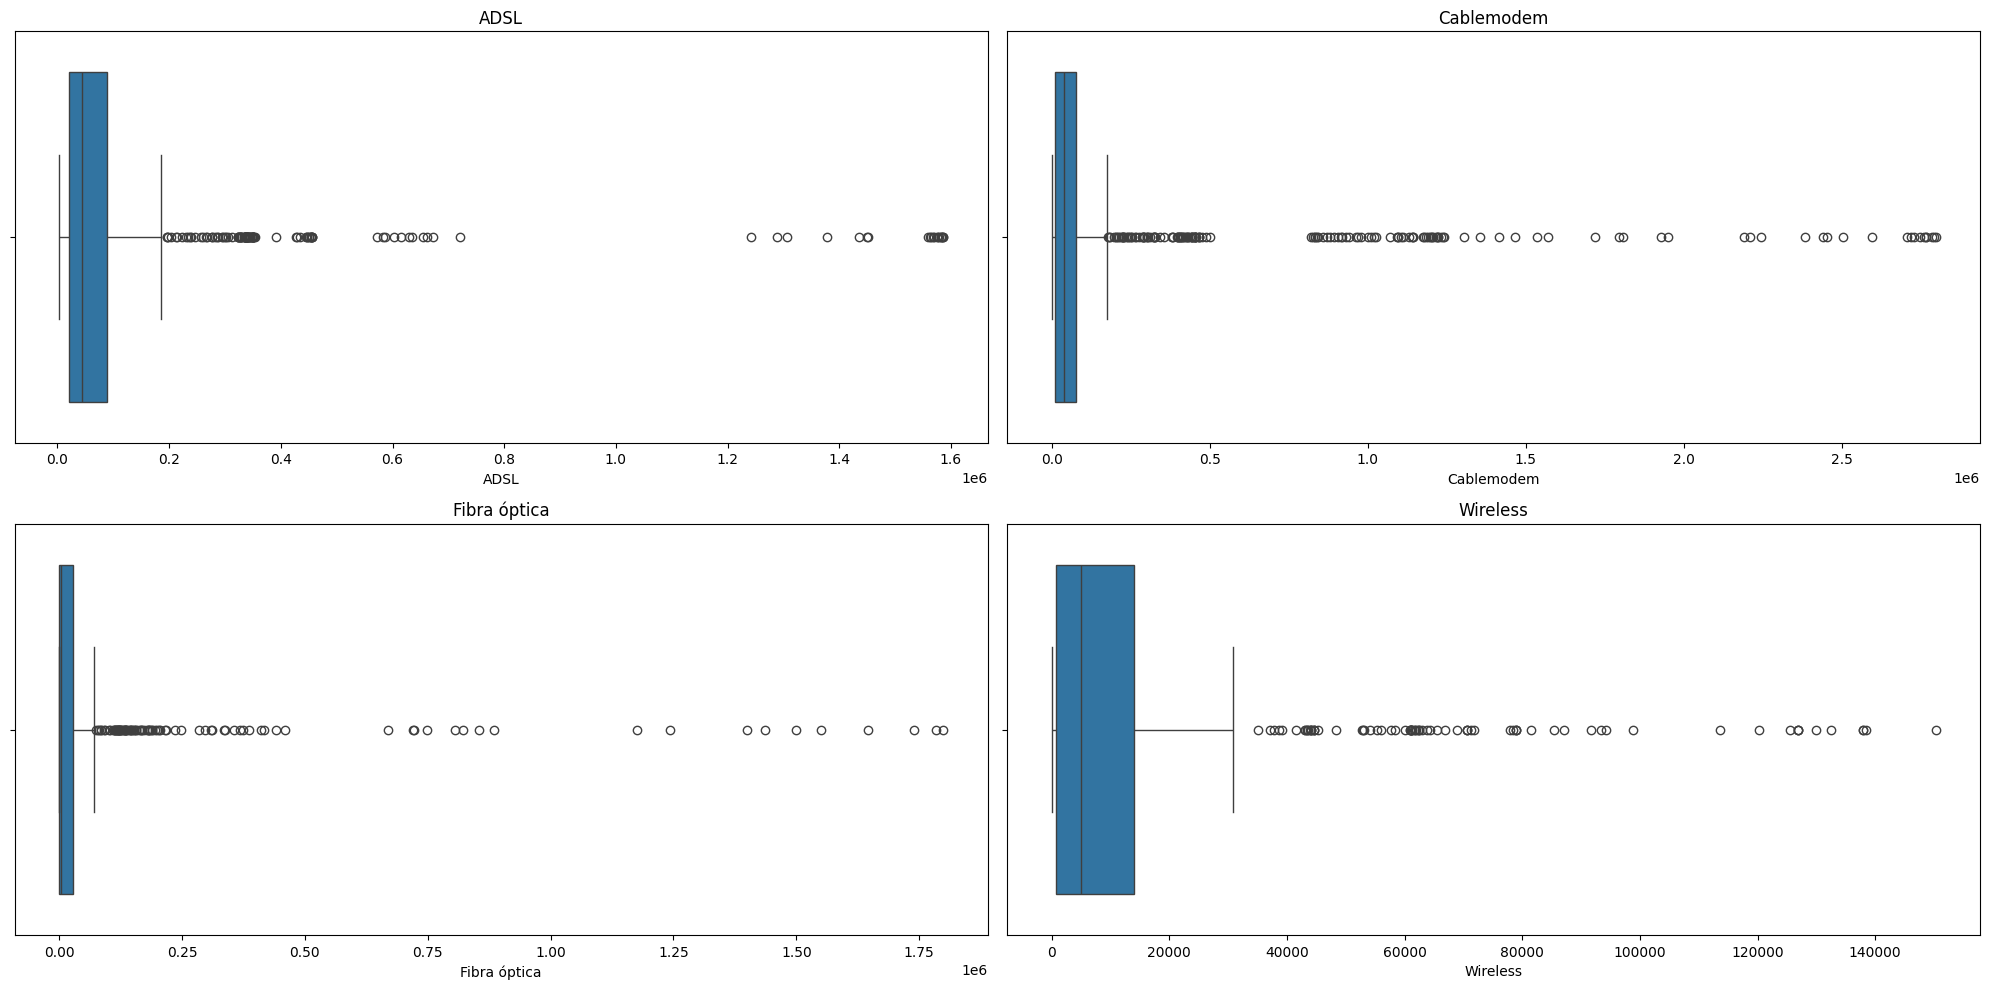

In [374]:

# Configurar subgráficos: 1 fila, 3 columnas
fig, axes = plt.subplots(2, 2,  figsize=(20, 10))

# Crear un boxplot en cada subgráfico
sns.boxplot(
    data=data_acceso_por_tegnologia,
    x="ADSL",
    ax=axes[0,0])
axes[0,0].set_title('ADSL')

sns.boxplot(
    data=data_acceso_por_tegnologia,
    x="Cablemodem",
    ax=axes[0,1])
axes[0,1].set_title('Cablemodem')

sns.boxplot(
    data=data_acceso_por_tegnologia,
    x="Fibra óptica",
    ax=axes[1,0])
axes[1,0].set_title('Fibra óptica')

sns.boxplot(
    data=data_acceso_por_tegnologia,
    x="Wireless",
    ax=axes[1,1])
axes[1,1].set_title('Wireless')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



plt.show()

Text(0.5, 1.0, 'Histograma de Wireless')

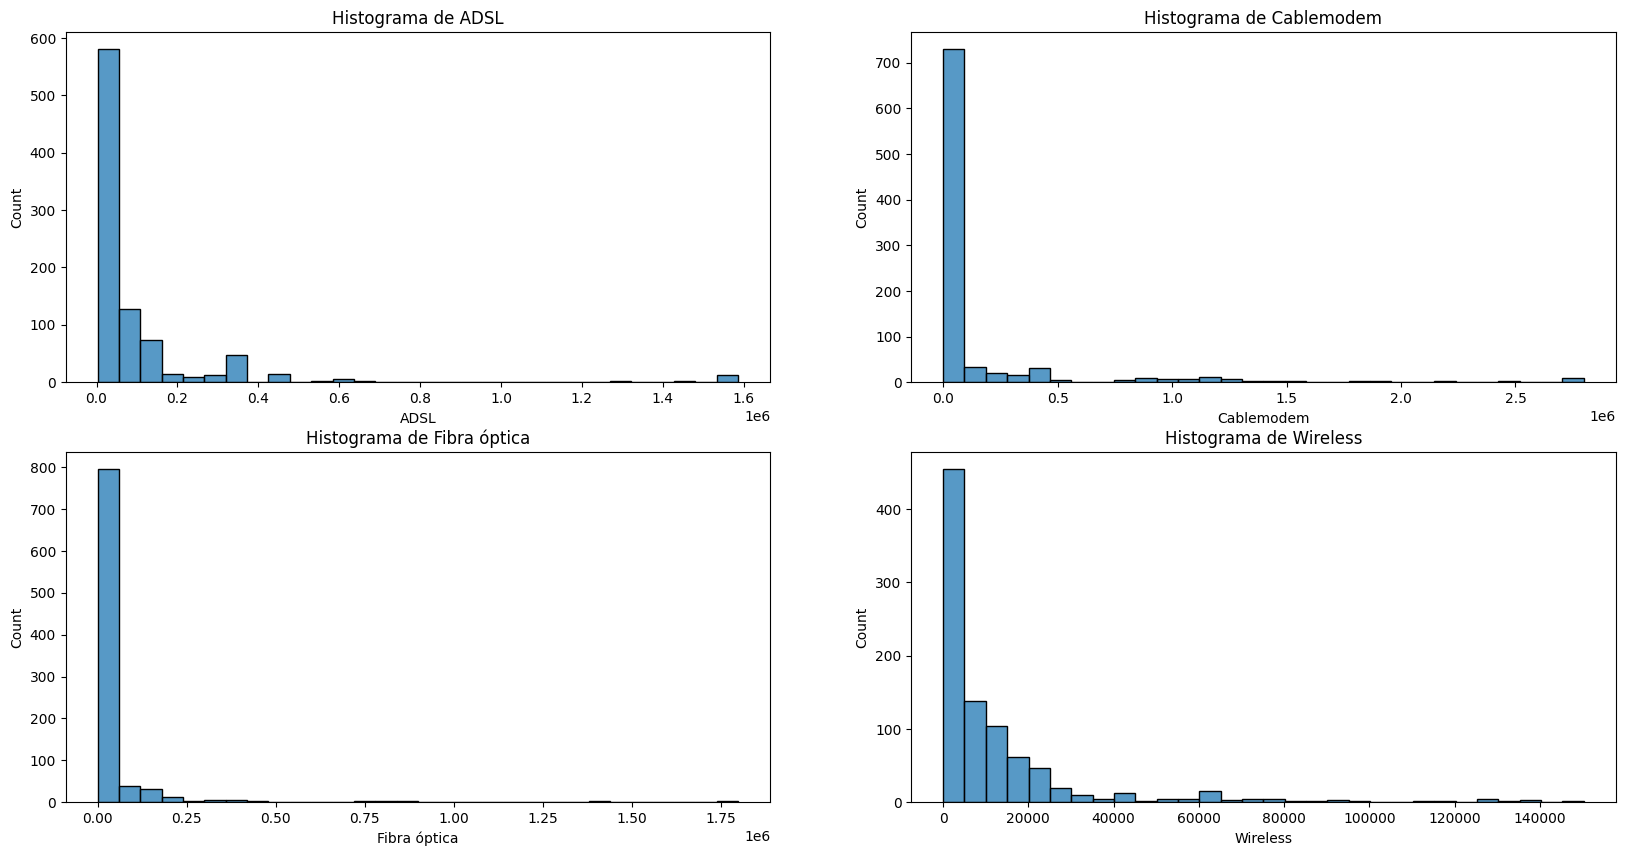

In [375]:
# Configurar subgráficos: 2 filas, 2 columnas
fig, axes = plt.subplots(2, 2,  figsize=(20, 10))
# Histograma
sns.histplot(data=data_acceso_por_tegnologia, x="ADSL", bins=30, ax=axes[0,0])
axes[0,0].set_title('Histograma de ADSL')
# Histograma
sns.histplot(data=data_acceso_por_tegnologia, x="Cablemodem", bins=30, ax=axes[0,1])
axes[0,1].set_title('Histograma de Cablemodem')
# Histograma
sns.histplot(data=data_acceso_por_tegnologia, x="Fibra óptica", bins=30, ax=axes[1,0])
axes[1,0].set_title('Histograma de Fibra óptica')
# Histograma
sns.histplot(data=data_acceso_por_tegnologia, x="Wireless", bins=30, ax=axes[1,1])
axes[1,1].set_title('Histograma de Wireless')

Contamos con bastantes outliers, verifiquemos cuales son:

In [376]:

Q1 = data_acceso_por_tegnologia["ADSL"].quantile(0.25)
Q3 = data_acceso_por_tegnologia["ADSL"].quantile(0.75)
IQR = Q3 - Q1
outliers = data_acceso_por_tegnologia[(data_acceso_por_tegnologia["ADSL"] < (Q1 - 1.5 * IQR)) | (data_acceso_por_tegnologia["ADSL"] > (Q3 + 1.5 * IQR))]

In [377]:
outliers


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297,2790663,1799013,150290,101294,5044557
24,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
48,2023,3,Buenos Aires,237705,2784175,1740239,137921,68197,4968237
72,2023,2,Buenos Aires,265537,2766463,1645945,138405,69138,4885488
96,2023,1,Buenos Aires,304583,2761043,1551074,132458,71770,4820928
...,...,...,...,...,...,...,...,...,...
884,2014,2,Santa Fe,324101,178495,3085,6041,636,512358
888,2014,1,Buenos Aires,1567685,1000879,120960,16528,33824,2739876
889,2014,1,Capital Federal,445569,820161,17767,1866,14555,1299918
893,2014,1,Córdoba,336841,225769,347,3585,368,566910


Existes 120 valores que salen de los bigotes, procedemos con la normalizacion de los datos logaritmica.

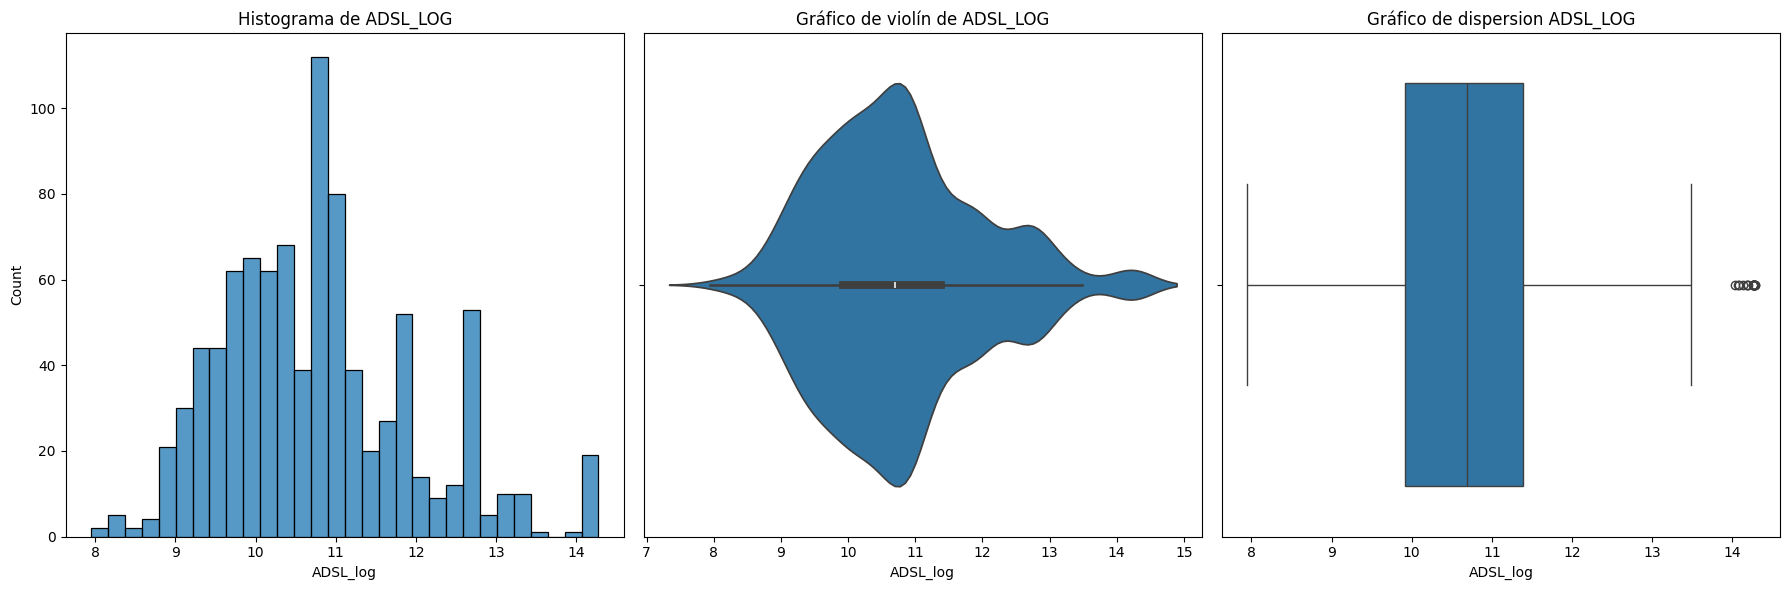

In [378]:

data_acceso_por_tegnologia["ADSL_log"] = np.log(data_acceso_por_tegnologia["ADSL"] + 1)  # +1 para evitar log(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data=data_acceso_por_tegnologia, x="ADSL_log", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL_LOG')

# Gráfico de violín
sns.violinplot(data=data_acceso_por_tegnologia, x="ADSL_log", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL_LOG')

#Gráfico de dispersion
sns.boxplot(data=data_acceso_por_tegnologia, x="ADSL_log",ax=axes[2])
axes[2].set_title('Gráfico de dispersion ADSL_LOG')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

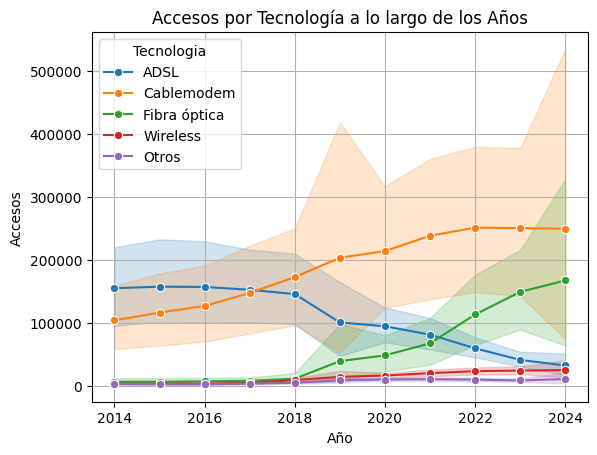

In [379]:
# Convertir el DataFrame a formato largo
data_acceso_por_tegnologia_long = pd.melt(data_acceso_por_tegnologia, id_vars=['Año'], value_vars=['ADSL', 'Cablemodem', 'Fibra óptica','Wireless','Otros'], 
                  var_name='Tecnologia', value_name='Accesos')

# Graficar con seaborn
sns.lineplot(data=data_acceso_por_tegnologia_long, x='Año', y='Accesos', hue='Tecnologia', marker='o')
plt.title('Accesos por Tecnología a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.grid(True)
plt.show()

**Conclusiones:**
**1. Crecimiento de la Fibra Óptica:**

La tecnología de fibra óptica ha mostrado un crecimiento significativo a partir del año 2020, superando a otras tecnologías en accesos durante los años 2023 y 2024. Esto sugiere una preferencia creciente por esta tecnología, probablemente debido a sus ventajas en términos de velocidad y estabilidad.

**2. Declive del ADSL:**

La tecnología ADSL muestra una tendencia decreciente a lo largo de los años. Aunque fue popular en años anteriores, su uso ha disminuido, lo que podría estar relacionado con la adopción de tecnologías más avanzadas como la fibra óptica y el cablemodem.

**3. Estabilidad del Cablemodem:**

La tecnología de cablemodem ha mantenido un crecimiento constante, situándose como una opción intermedia en términos de popularidad y uso. Aunque no crece tan rápidamente como la fibra óptica, sigue siendo una opción sólida para muchos usuarios.

**4. Wireless y Otros:**

Las tecnologías wireless y otras (posiblemente satelital o DSL) han mantenido un uso relativamente bajo en comparación con ADSL, cablemodem, y fibra óptica. No obstante, parecen tener una base estable de usuarios, aunque no han experimentado un crecimiento significativo.

**5. Preferencias Tecnológicas:**

A lo largo de los años, las preferencias tecnológicas en Argentina han evolucionado. La transición de tecnologías más antiguas como ADSL a tecnologías más avanzadas como la fibra óptica es evidente en este gráfico, reflejando un cambio en la infraestructura y las demandas de los consumidores.
Este gráfico sugiere una transformación del mercado de telecomunicaciones, donde las tecnologías más nuevas y avanzadas están ganando terreno, mientras que las más antiguas están siendo reemplazadas o están en declive.


## C. Hoja: Penetración de hogares

In [380]:
data_penetracion_por_hogares = pd.read_excel('D:\Bootcamp\Henry\CURSO\Proyecto Individual 2\Repositorio\Data\Internet.xlsx', sheet_name="Penetracion-hogares")
data_penetracion_por_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.100000
1,2024,1,Capital Federal,119.530000
2,2024,1,Catamarca,68.820000
3,2024,1,Chaco,46.700000
4,2024,1,Chubut,84.890000
...,...,...,...,...
979,2014,1,Santa Cruz,28.939093
980,2014,1,Santa Fe,47.847663
981,2014,1,Santiago Del Estero,16.309924
982,2014,1,Tierra Del Fuego,63.965926


Verificamo si contamos con valores faltantes.

In [381]:
data_penetracion_por_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

Vemos que no contamos con valores faltantes. Procedemos a redondear los valores 'Accesos por cada 100 hogares'

In [382]:
data_penetracion_por_hogares.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

In [383]:
data_penetracion_por_hogares['Accesos por cada 100 hogares'] = data_penetracion_por_hogares['Accesos por cada 100 hogares'].round(2)
data_penetracion_por_hogares.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [384]:
data_penetracion_por_hogares.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

Verificamos si contamos con outliers

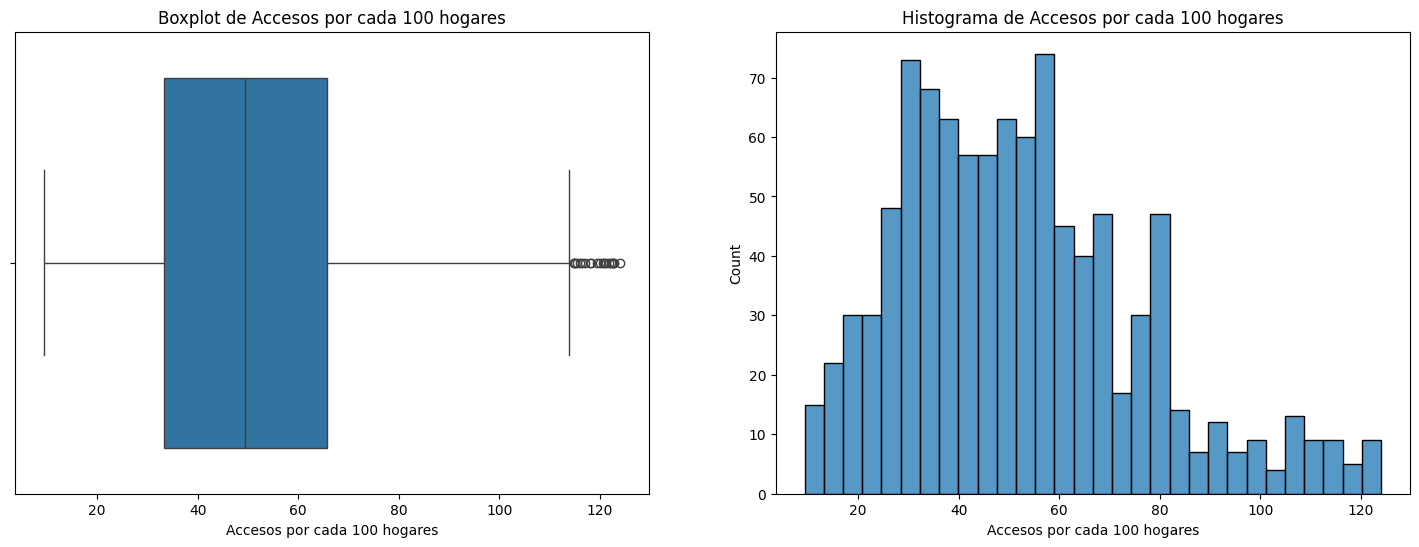

In [385]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(
    data=data_penetracion_por_hogares,
    x="Accesos por cada 100 hogares",
    ax=axes[0])
axes[0].set_title('Boxplot de Accesos por cada 100 hogares')

sns.histplot(
    data=data_penetracion_por_hogares, 
    x="Accesos por cada 100 hogares", bins=30, 
    ax=axes[1])
axes[1].set_title('Histograma de Accesos por cada 100 hogares')

plt.show()

Efectivamente contamos con valores outliers, verificamos de otra manera.

In [386]:

Q1_penetracion_hogar = data_penetracion_por_hogares["Accesos por cada 100 hogares"].quantile(0.25)
Q3_penetracion_hogar= data_penetracion_por_hogares["Accesos por cada 100 hogares"].quantile(0.75)
IQR_penetracion_hogar = Q3 - Q1

In [387]:
outliers_penetracion_hogar = data_penetracion_por_hogares[(data_penetracion_por_hogares["Accesos por cada 100 hogares"] < (Q1 - 1.5 * IQR)) | (data_penetracion_por_hogares["Accesos por cada 100 hogares"] > (Q3 + 1.5 * IQR))]
outliers_penetracion_hogar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


Mediante este analisis no nos figura valores outliers, intentaremos otra manera.Ya que tenemos en cuenta, que en la estadistica no cuenta con mayor crecimiento del 100% ni menor a l 0% Entonces filtraremos los datos para encontrar esos valores que estan fuera de los valores permitidos

In [388]:
df_outliers_penetracion_hogares = data_penetracion_por_hogares[(data_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100)]


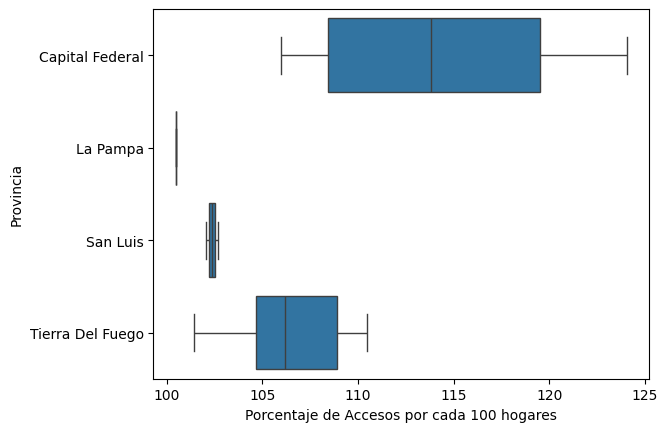

In [389]:
sns.boxplot(data=df_outliers_penetracion_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

Ahora si nos figura los outiers, no podemos simplemente eliminarlos debido a que representan el crecimiento de contratacion del serrvicio por año por lo que para mitigarlo usaremos el promedio de crecimieno de estas 3 provincias dejando de lado los outliers en el calculo.

In [390]:
data_penetracion_por_hogares["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [391]:
data_penetracion_por_hogares[(data_penetracion_por_hogares["Accesos por cada 100 hogares"] <= 120) & (data_penetracion_por_hogares["Provincia"] == "Capital Federal")]


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2024,1,Capital Federal,119.53
25,2023,4,Capital Federal,117.02
49,2023,3,Capital Federal,116.40
73,2023,2,Capital Federal,115.48
193,2022,1,Capital Federal,111.80
217,2021,4,Capital Federal,111.27
241,2021,3,Capital Federal,111.27
265,2021,2,Capital Federal,110.14
289,2021,1,Capital Federal,108.42
313,2020,4,Capital Federal,108.31


se cuenta con un inconveniente, los datos de la provincia 'Capital Federal' son todas outliers imposibilitando el uso del promedio. En un caso real se deberia consultar al que recolecto y verificar los datos. Para el caso del proyecto se usara el valor del primer cuartil.

In [392]:
data_penetracion_por_hogares[(data_penetracion_por_hogares["Accesos por cada 100 hogares"] < 100)]["Accesos por cada 100 hogares"].quantile(0.25)


np.float64(32.6675)

Se restara este valor a todos los valores outliers de 'Capital Federal'

In [393]:
data_penetracion_por_hogares.loc[data_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100, "Accesos por cada 100 hogares"] -= 32.6675


In [394]:
data_penetracion_por_hogares[data_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100]


,Año,Trimestre,Provincia,Accesos por cada 100 hogares


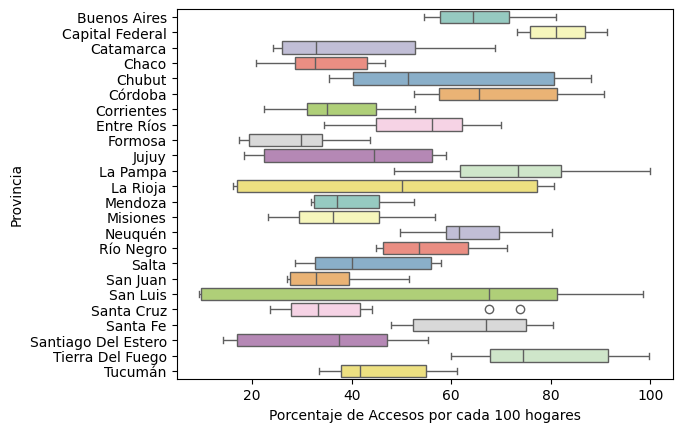

In [395]:
sns.boxplot(data=data_penetracion_por_hogares, x="Accesos por cada 100 hogares", y="Provincia", hue = "Provincia",palette="Set3")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

Ya casi se no se aprecia los outlier, sin embargo aún figura en una de las provincias.

In [396]:
data_penetracion_por_hogares[(data_penetracion_por_hogares["Accesos por cada 100 hogares"] > 40) & (data_penetracion_por_hogares["Provincia"] == "Santa Cruz")]


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
19,2024,1,Santa Cruz,67.58
43,2023,4,Santa Cruz,73.75
67,2023,3,Santa Cruz,40.89
91,2023,2,Santa Cruz,41.66
115,2023,1,Santa Cruz,43.42
139,2022,4,Santa Cruz,43.53
163,2022,3,Santa Cruz,43.19
187,2022,2,Santa Cruz,43.15
211,2022,1,Santa Cruz,43.34
235,2021,4,Santa Cruz,43.05


Vemos que el valor se encuentra dentro del rango de crecimiento.

Verificamos los valores nulos

In [397]:
data_penetracion_por_hogares.isna().sum()


Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

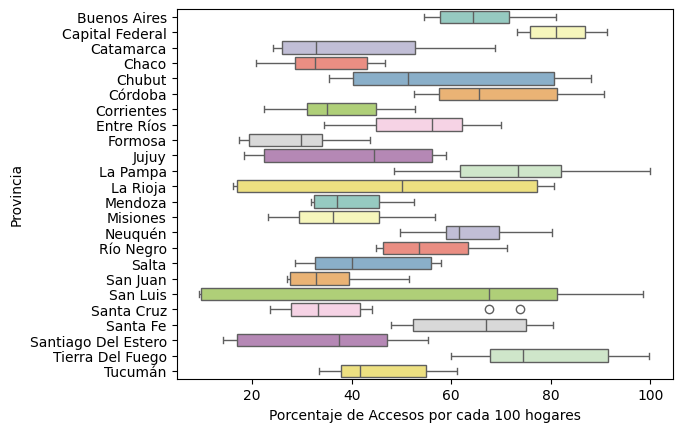

In [398]:
sns.boxplot(data=data_penetracion_por_hogares, x="Accesos por cada 100 hogares", y="Provincia", hue = "Provincia",palette="Set3")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

El gráfico que se presenta es un diagrama de cajas (box plot) que muestra la distribución de los accesos por cada 100 hogares en varias provincias argentinas.Las conclusiones son:

__Variabilidad de Accesos:__

Las provincias presentan una gran variabilidad en cuanto a los accesos por cada 100 hogares. Algunas provincias tienen una dispersión más amplia (e.g., Buenos Aires, Córdoba, Santa Fe), mientras que otras tienen una dispersión más estrecha (e.g., La Rioja, Mendoza).

__Medianas y Rangos Intercuartílicos:__

Provincias como Buenos Aires y Córdoba tienen medianas más altas, indicando un mayor número de accesos por cada 100 hogares. Provincias como Formosa y Santiago del Estero tienen medianas más bajas, indicando un menor número de accesos.

__Valores Atípicos:__

Se observan algunos valores atípicos, como en las provincias de Formosa y San Luis, que indican valores de acceso significativamente diferentes del resto de los datos.

__Comparaciones Entre Provincias:__

Buenos Aires y Córdoba parecen tener los mayores niveles de accesos por cada 100 hogares. Provincias como La Pampa y Tucumán tienen medianas similares, pero diferentes niveles de variabilidad.

__Rangos de Accesos:__

La mayoría de las provincias tienen rangos de accesos que varían considerablemente, lo que sugiere diferencias significativas en la conectividad dentro de las mismas provincias. En resumen, el gráfico muestra una diversidad considerable en los accesos por cada 100 hogares entre las diferentes provincias argentinas, con algunas provincias destacándose por tener una mayor conectividad y otras con menos accesos. La variabilidad dentro de las provincias también es notable, lo que indica disparidades internas en el acceso a servicios.

# D. Hoja: Penetración-poblacion

In [399]:
data_penetracion_por_poblacion = pd.read_excel('D:\Bootcamp\Henry\CURSO\Proyecto Individual 2\Repositorio\Data\Internet.xlsx', sheet_name="Penetración-poblacion")
data_penetracion_por_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.800000
1,2024,1,Capital Federal,48.780000
2,2024,1,Catamarca,17.500000
3,2024,1,Chaco,12.480000
4,2024,1,Chubut,26.020000
...,...,...,...,...
979,2014,1,Santa Cruz,8.677327
980,2014,1,Santa Fe,15.077801
981,2014,1,Santiago Del Estero,4.058899
982,2014,1,Tierra Del Fuego,19.104921


redondeamos la columna : 'Accesos por cada 100 hab'

In [400]:
data_penetracion_por_poblacion["Accesos por cada 100 hab"] = data_penetracion_por_poblacion["Accesos por cada 100 hab"].round(2)
data_penetracion_por_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02
...,...,...,...,...
979,2014,1,Santa Cruz,8.68
980,2014,1,Santa Fe,15.08
981,2014,1,Santiago Del Estero,4.06
982,2014,1,Tierra Del Fuego,19.10


Verificamos se contamos con valores nulos

In [401]:
data_penetracion_por_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

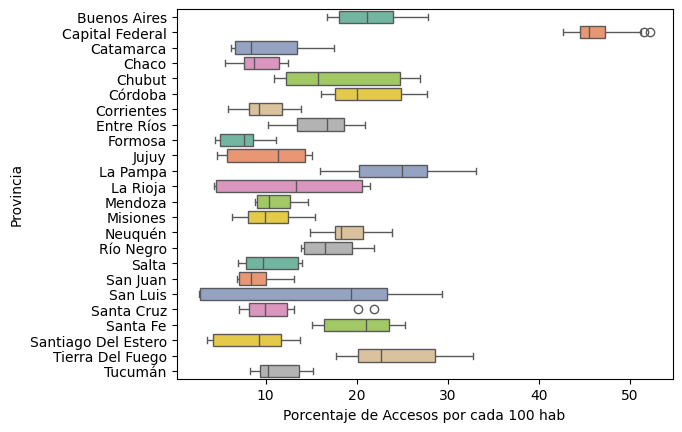

In [402]:

# Crear el diagrama de caja utilizando seaborn
sns.boxplot(data=data_penetracion_por_poblacion, x="Accesos por cada 100 hab", y="Provincia", hue="Provincia", palette="Set2")
# Etiqueta para el eje x
plt.xlabel("Porcentaje de Accesos por cada 100 hab")
# Mostrar el gráfico
plt.show()

In [403]:
data_penetracion_por_poblacion[data_penetracion_por_poblacion["Provincia"] == "Capital Federal"]


,Año,Trimestre,Provincia,Accesos por cada 100 hab
1,2024,1,Capital Federal,48.78
25,2023,4,Capital Federal,47.80
49,2023,3,Capital Federal,47.60
73,2023,2,Capital Federal,47.27
97,2023,1,Capital Federal,50.23
121,2022,4,Capital Federal,50.35
145,2022,3,Capital Federal,50.22
169,2022,2,Capital Federal,49.87
193,2022,1,Capital Federal,46.01
217,2021,4,Capital Federal,45.85


Aunque figure algunos outliers vemos que aun se encuentran dentro de los margenes e crecimeinto.

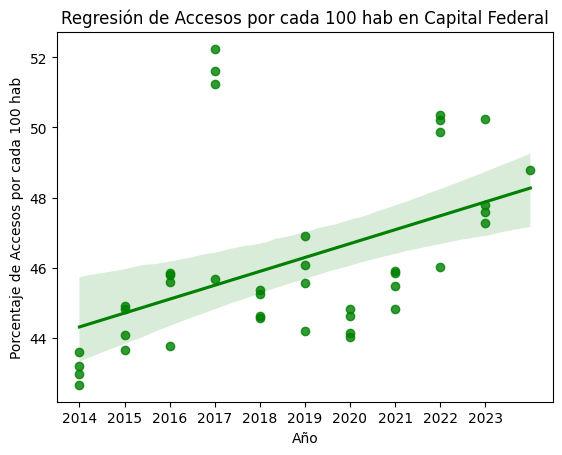

In [404]:

# Filtrar datos para la provincia de "Capital Federal"
data_capital = data_penetracion_por_poblacion[data_penetracion_por_poblacion["Provincia"] == "Capital Federal"]

# Crear el gráfico de regresión utilizando seaborn
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=data_capital, color="green")

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Mostrar el gráfico
plt.show()

Se observa que hay datos muy por encima de la curva en el año 2017, demos una vista asi como en el año 2020.

In [405]:
data_penetracion_por_poblacion[(data_penetracion_por_poblacion["Provincia"] == "Capital Federal") & (data_penetracion_por_poblacion["Año"] == 2017)]


,Año,Trimestre,Provincia,Accesos por cada 100 hab
601,2017,4,Capital Federal,51.62
625,2017,3,Capital Federal,51.24
649,2017,2,Capital Federal,52.24
673,2017,1,Capital Federal,45.69


In [406]:
data_penetracion_por_poblacion[(data_penetracion_por_poblacion["Provincia"] == "Capital Federal") & (data_penetracion_por_poblacion["Año"] == 2020)]


,Año,Trimestre,Provincia,Accesos por cada 100 hab
313,2020,4,Capital Federal,44.83
337,2020,3,Capital Federal,44.62
361,2020,2,Capital Federal,44.15
385,2020,1,Capital Federal,44.02


__CONCLUSIONES:__

__Tendencia General:__ La línea de regresión muestra una tendencia ascendente a lo largo de los años, lo que indica que, en general, el número de accesos por cada 100 habitantes ha aumentado en Capital Federal durante este período.

__Variabilidad:__ Los puntos de datos individuales muestran una considerable dispersión alrededor de la línea de regresión, lo que sugiere que hay variabilidad en los datos de año a año.

__Intervalo de Confianza:__ La sombra azul alrededor de la línea de regresión representa el intervalo de confianza. A medida que se aleja del inicio del período, la banda se ensancha, indicando mayor incertidumbre en la predicción de la tendencia a futuro.

__Accesos Máximos y Mínimos:__ A lo largo de los años, se observan picos en ciertos años, como en 2015 y 2023, donde los accesos alcanzan más de 52 por cada 100 habitantes. Por otro lado, hay años donde los accesos son considerablemente menores.

En resumen, el gráfico indica que los accesos por cada 100 habitantes han mostrado una tendencia creciente en Capital Federal durante el período estudiado, aunque con variaciones significativas en algunos años.

# E. Hoja: Penetracion-totales

In [407]:
data_Penetracion_totales = pd.read_excel('D:\Bootcamp\Henry\CURSO\Proyecto Individual 2\Repositorio\Data\Internet.xlsx', sheet_name="Penetracion-totales")
data_Penetracion_totales

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.890000,24.790000,Ene-Mar 2024
1,2023,4,78.560000,24.660000,Oct-Dic 2023
2,2023,3,77.840000,24.410000,Jul-Sept 2023
3,2023,2,77.020000,24.140000,Abr-Jun 2023
4,2023,1,77.200000,24.170000,Ene-Mar 2023
5,2022,4,77.210000,24.150000,Oct-Dic 2022
6,2022,3,76.640000,23.950000,Jul-Sept 2022
7,2022,2,75.965424,23.720442,Abr-Jun 2022
8,2022,1,73.878803,23.049171,Ene-Mar 2022
9,2021,4,73.176397,22.810702,Oct-Dic 2021


dividimos 'Accesos por cada 100 hogares	' / 100

In [408]:
data_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = data_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] / 100


Redondeamos 'Accesos por cada 100 hab'

In [409]:
data_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = data_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]].round(3)


Verificamos si contamos con valores nulos

In [410]:
data_Penetracion_totales.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [411]:
data_Penetracion_totales_tendencia = data_Penetracion_totales.groupby(by="Año")["Accesos por cada 100 hab"].sum()


In [412]:
data_Penetracion_totales_tendencia = data_Penetracion_totales_tendencia.reset_index()


In [413]:
data_Penetracion_totales_tendencia["Accesos por cada 100 hab"] = data_Penetracion_totales_tendencia["Accesos por cada 100 hab"].apply(lambda x: x / 4 if x != data_Penetracion_totales_tendencia["Accesos por cada 100 hab"].iloc[-1] else x)
data_Penetracion_totales_tendencia

,Año,Accesos por cada 100 hab
0,2014,0.15275
1,2015,0.15925
2,2016,0.16350
3,2017,0.17200
4,2018,0.18500
5,2019,0.19800
6,2020,0.20250
7,2021,0.21850
8,2022,0.23725
9,2023,0.24350


Se agrupa la columna acceso por cada 100 hab, luego se divide entre 4 para que se evalue por trimestre. Ademas fue necesario no aplicar esto mismo a la ultima fila correspondiente al año 2024 ya que en ese año solo se cuenta con el primer trimestre

Procedemos a graficar:

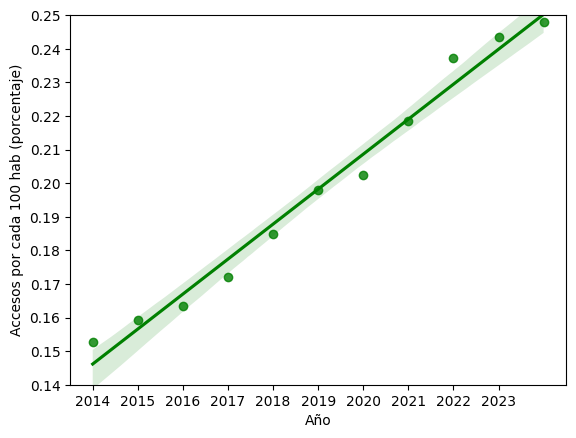

In [414]:

# Crear el gráfico
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=data_Penetracion_totales_tendencia, color="green")

# Establecer límites del eje y
plt.ylim(0.14, 0.24)

# Establecer límites del eje x


# Establecer las etiquetas de los ejes
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hab (porcentaje)")

# Establecer los ticks de los ejes
plt.xticks(range(2014, 2024))
plt.yticks([0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25])

# Mostrar el gráfico
plt.show()

Cada punto representa el porcentaje de crecimiento de cada año, teniendo un crecimeinto positivo.

Ahora se realizara un analisis de crecimeinto trimestral

In [415]:
df_Penetracion_totales_comparacion = data_Penetracion_totales[["Año","Trimestre","Accesos por cada 100 hab"]]


In [416]:
df_penetracion_trim1 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 1]
df_penetracion_trim2 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 2]
df_penetracion_trim3 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 3]
df_penetracion_trim4 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 4]
     

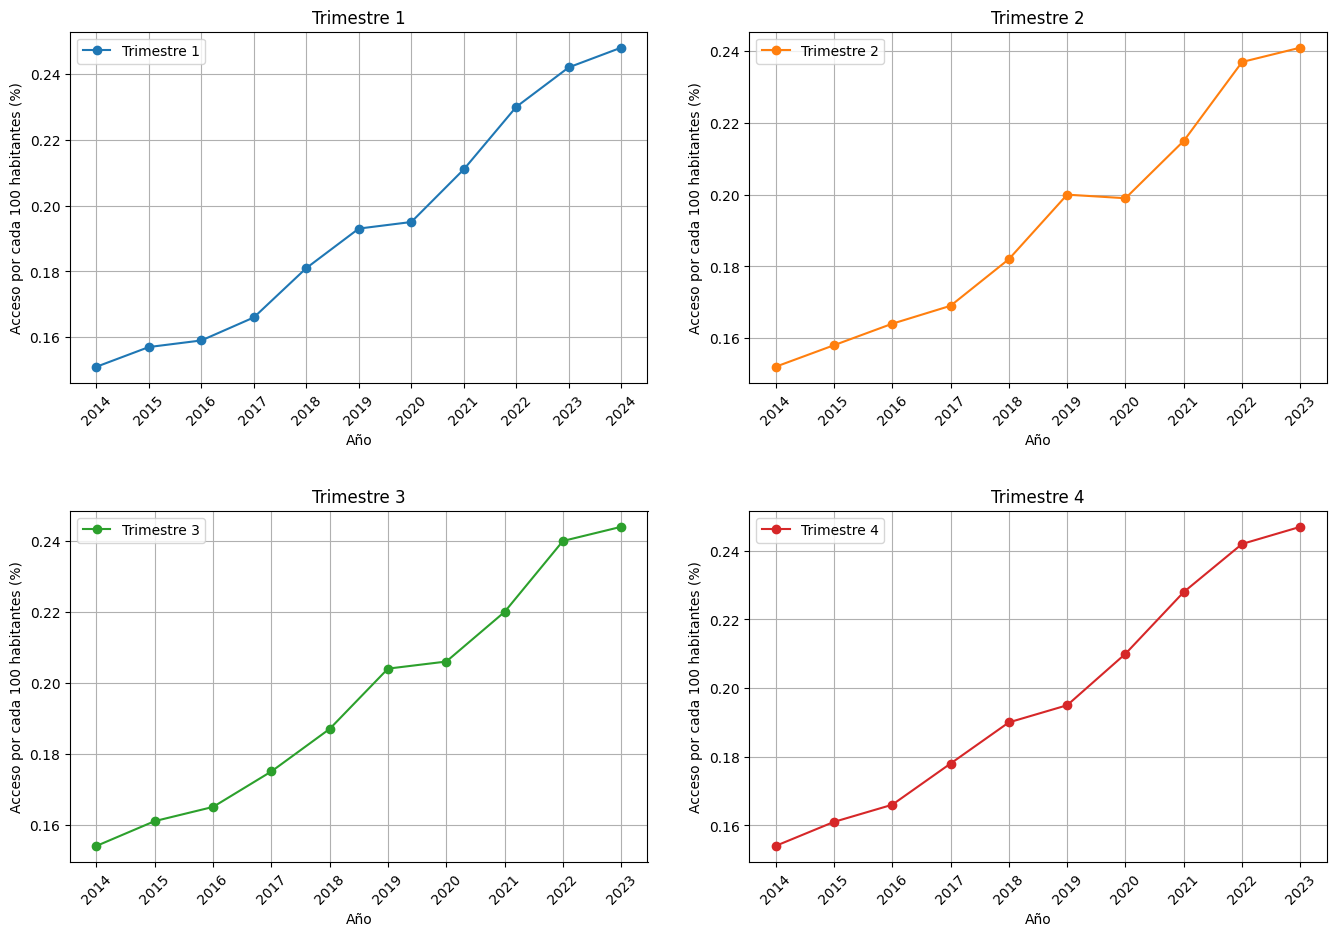

In [417]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que df_penetracion_trim1, df_penetracion_trim2, df_penetracion_trim3, df_penetracion_trim4 ya están definidos

# Crear subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Colores para las líneas
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Diferentes colores para cada trimestre

# Trimestre 1
axs[0, 0].plot(df_penetracion_trim1['Año'], df_penetracion_trim1['Accesos por cada 100 hab'], 
               marker='o', color=colors[0], label='Trimestre 1')
axs[0, 0].set_title('Trimestre 1')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Acceso por cada 100 habitantes (%)')
axs[0, 0].set_xticks(range(2014, 2025))
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Trimestre 2
axs[0, 1].plot(df_penetracion_trim2['Año'], df_penetracion_trim2['Accesos por cada 100 hab'], 
               marker='o', color=colors[1], label='Trimestre 2')
axs[0, 1].set_title('Trimestre 2')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Acceso por cada 100 habitantes (%)')
axs[0, 1].set_xticks(range(2014, 2024))
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Trimestre 3
axs[1, 0].plot(df_penetracion_trim3['Año'], df_penetracion_trim3['Accesos por cada 100 hab'], 
               marker='o', color=colors[2], label='Trimestre 3')
axs[1, 0].set_title('Trimestre 3')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Acceso por cada 100 habitantes (%)')
axs[1, 0].set_xticks(range(2014, 2024))
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trimestre 4
axs[1, 1].plot(df_penetracion_trim4['Año'], df_penetracion_trim4['Accesos por cada 100 hab'], 
               marker='o', color=colors[3], label='Trimestre 4')
axs[1, 1].set_title('Trimestre 4')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Acceso por cada 100 habitantes (%)')
axs[1, 1].set_xticks(range(2014, 2024))
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el layout para que los subplots no se solapen
plt.tight_layout(pad=3.0)

# Mostrar los gráficos
plt.show()


**Conclusiones del Análisis de los Gráficos de Accesos por Trimestre**
El conjunto de gráficos refleja la evolución del porcentaje de accesos por cada 100 habitantes, desglosado por trimestres, desde 2014 hasta 2023. Las conclusiones derivadas de estos gráficos son las siguientes:

**1. Tendencia General:** A lo largo de los años, todos los trimestres muestran una tendencia al alza en el porcentaje de accesos por cada 100 habitantes, lo que indica un crecimiento constante y sostenido en los accesos.

**2. Comparación entre Trimestres:** Los cuatro trimestres exhiben una tendencia de crecimiento similar desde 2014 hasta 2023. La consistencia en la pendiente de crecimiento sugiere que ningún trimestre se destaca significativamente en términos de aumento de accesos.

**3. Puntos de Crecimiento Significativo:** A partir de 2017, se observa un aumento más pronunciado en todos los trimestres. Entre 2020 y 2021, hay un incremento notable en el crecimiento, probablemente impulsado por la pandemia de COVID-19, que generó una mayor demanda de accesos debido al teletrabajo y la educación en línea.

**4. Año 2023:** En 2023, cada trimestre alcanza los valores más altos, llegando aproximadamente al 0.24% de accesos por cada 100 habitantes.

**5. Estacionalidad:** No se detecta una estacionalidad marcada en los datos, ya que el crecimiento es relativamente uniforme entre los trimestres. Esto sugiere que el aumento en los accesos ha sido constante a lo largo de los años sin grandes fluctuaciones estacionales.

En resumen, los gráficos evidencian un crecimiento constante y sostenido en el porcentaje de accesos por cada 100 habitantes en Capital Federal, con un incremento notable a partir de 2017 y picos máximos en 2023. La tendencia de crecimiento es homogénea entre los cuatro trimestres, sin indicios de estacionalidad significativa.